In [64]:
# 2-1. 프로젝트 1 : 손수 설계하는 선형회귀, 당뇨병 수치를 맞춰보자!
## (1) 데이터 가져오기

# - sklearn.datasets의 load_diabetes에서 데이터를 가져와주세요.
from sklearn.datasets import load_diabetes

diabetes=load_diabetes()

# - diabetes의 data를 df_X에, target을 df_y에 저장해주세요.
df_X=diabetes.data
df_y=diabetes.target

# 데이터 모양 파악하기
print(f"당뇨병 환자 데이터 정보: {df_X.shape}")
print(f"타겟 데이터 정보: {df_y.shape}")

당뇨병 환자 데이터 정보: (442, 10)
타겟 데이터 정보: (442,)


In [65]:
## (2) 모델에 입력할 데이터 X 준비하기
# - df_X에 있는 값들을 numpy array로 변환해서 저장해주세요.
import numpy as np

# Use only one feature; 특정 샘플 가져오기
# # 참고: https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html#sphx-glr-auto-examples-linear-model-plot-ols-py
# X = df_X[:, np.newaxis, 2]
    ## 하나만 가져와서 테스트를 해봤는데 W가 1이 되버림을 확인; 데이터셋이 가지고 있는 전체 feature를 다 쓰기 위해서 df_X는 그대로 사용하되 아래 코드에서 이미 X를 끌어다 쓰고 있어서 이름만 맞춰줌
X = df_X

# 타입확인
print(type(X))
# 값 확인
print(X)

<class 'numpy.ndarray'>
[[ 0.03807591  0.05068012  0.06169621 ... -0.00259226  0.01990749
  -0.01764613]
 [-0.00188202 -0.04464164 -0.05147406 ... -0.03949338 -0.06833155
  -0.09220405]
 [ 0.08529891  0.05068012  0.04445121 ... -0.00259226  0.00286131
  -0.02593034]
 ...
 [ 0.04170844  0.05068012 -0.01590626 ... -0.01107952 -0.04688253
   0.01549073]
 [-0.04547248 -0.04464164  0.03906215 ...  0.02655962  0.04452873
  -0.02593034]
 [-0.04547248 -0.04464164 -0.0730303  ... -0.03949338 -0.00422151
   0.00306441]]


In [66]:
## (3) 모델에 예측할 데이터 y 준비하기
# - df_y에 있는 값들을 numpy array로 변환해서 저장해주세요.
    ### df_y가 1-dimension 구조의 numpy.ndarray 객체라서 변환하지 않아도 된다;로 이해중
# 타입확인
print(type(df_y))
# 값 확인; skip
# print(df_y)

<class 'numpy.ndarray'>


In [67]:
## (4) train 데이터와 test 데이터로 분리하기
# - X와 y 데이터를 각각 train 데이터와 test 데이터로 분리해주세요.
from sklearn.model_selection import train_test_split

# Split the data into training/testing sets
# test_size와 random_state는 우선 예제 그대로 따라해봄
X_train, X_test, y_train, y_test = train_test_split(X, df_y, test_size=0.2, random_state=42)

print("입력데이터 현황")
print(f"{X_train.shape}, {y_train.shape}")
print("정답 데이터 현황")
print(f"{X_test.shape}, {y_test.shape}")

입력데이터 현황
(353, 10), (353,)
정답 데이터 현황
(89, 10), (89,)


In [68]:
## (5) 모델 준비하기
# - 입력 데이터 개수에 맞는 가중치 W와 b를 준비해주세요
    ## 10개의 랜덤 값을 W로, 하나의 상수값을 b로
W = np.random.rand(10)
b = np.random.rand()

print(f"가중치: {W}")
print(f"Bias: {b}")
# - 모델 함수를 구현해주세요; model() 예제 사용해봄
def model(X, W, b):
    predictions = 0
    for i in range(10):
        predictions += X[:, i] * W[i]
    predictions += b
    return predictions

가중치: [0.16121209 0.1033328  0.27057351 0.36273737 0.15393703 0.67605414
 0.77690849 0.49488503 0.78675641 0.71154203]
Bias: 0.7638682927952172


In [69]:
# (6) 손실함수 loss 정의하기
# - 손실함수를 MSE 함수로 정의해주세요; 예제 참고함
def MSE(a, b):
    mse = ((a - b) ** 2).mean() # 두 값의 차이의 제곱의 평균
    return mse

def loss(X, W, b, y):
    predictions = model(X, W, b)
    L = MSE(predictions, y)
    return L


In [70]:
# (7) 기울기를 구하는 gradient 함수 구현하기
# - 기울기를 계산하는 gradient 함수를 구현해주세요; 예제 참고함
def gradient(X, W, b, y):
    N = len(y)  # N is counts of the data points

    # y_pred 준비
    y_pred = model(X, W, b)

    # gradient 공식 적용; 오차값 is y_pred - y
    dW = 1/N * 2 * X.T.dot(y_pred - y)

    # bdml gradient 계산
    db = 2 * (y_pred - y).mean()
    return dW, db

In [89]:
# (8) 하이퍼 파라미터인 학습률 설정하기
# - 학습률, learning rate를 설정해주세요
# - 만약 학습이 잘 되지 않는다면 learning rate 값을 한번 여러 가지로 설정하며 실험해 보세요
'''
    LEARNING RATE 테스트 (500회) & X_train
    0.0002 --> 9000 대 loss
    0.001 --> 6000 대 loss

    LEARNING RATE 테스트 (1000회) & X_train
    0.001 --> 5800 대 loss
    0.01 --> 4700 대 loss
    0.03 --> 3500 대 loss
    0.05 --> 3100 대 loss
    0.07 --> 2960 대 loss

    LEARNING RATE 테스트 & X_test
    0.01 --> 기록 못함..
    0.07 --> 2870 대 loss
'''
learning_rate = 0.07

10 회 반복: Loss 3011.6930
20 회 반복: Loss 3010.9990
30 회 반복: Loss 3010.3097
40 회 반복: Loss 3009.6249
50 회 반복: Loss 3008.9447
60 회 반복: Loss 3008.2690
70 회 반복: Loss 3007.5977
80 회 반복: Loss 3006.9309
90 회 반복: Loss 3006.2685
100 회 반복: Loss 3005.6106
110 회 반복: Loss 3004.9569
120 회 반복: Loss 3004.3076
130 회 반복: Loss 3003.6626
140 회 반복: Loss 3003.0218
150 회 반복: Loss 3002.3852
160 회 반복: Loss 3001.7529
170 회 반복: Loss 3001.1247
180 회 반복: Loss 3000.5006
190 회 반복: Loss 2999.8807
200 회 반복: Loss 2999.2648
210 회 반복: Loss 2998.6530
220 회 반복: Loss 2998.0452
230 회 반복: Loss 2997.4414
240 회 반복: Loss 2996.8415
250 회 반복: Loss 2996.2456
260 회 반복: Loss 2995.6536
270 회 반복: Loss 2995.0655
280 회 반복: Loss 2994.4812
290 회 반복: Loss 2993.9007
300 회 반복: Loss 2993.3241
310 회 반복: Loss 2992.7512
320 회 반복: Loss 2992.1820
330 회 반복: Loss 2991.6166
340 회 반복: Loss 2991.0548
350 회 반복: Loss 2990.4968
360 회 반복: Loss 2989.9423
370 회 반복: Loss 2989.3915
380 회 반복: Loss 2988.8442
390 회 반복: Loss 2988.3005
400 회 반복: Loss 2987.7604
410 회 반복:

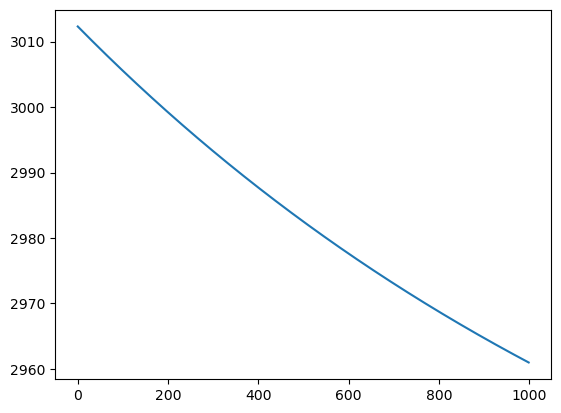

In [93]:
# (9) 모델 학습하기
# - 정의된 손실함수와 기울기 함수로 모델을 학습해주세요
# - loss값이 충분히 떨어질 때까지 학습을 진행해 주세요
# - 입력하는 데이터인 X에 들어가는 특성 컬럼들을 몇 개 빼도 괜찮습니다. 다양한 데이터로 실험해 보세요

## 오차값들을 저장할 list 선언
losses = []

for i in range(1, 1001):    # 500번 돌려보다가 1000번으로 교체함
    dW, db = gradient(X_train, W, b, y_train)
    W -= learning_rate * dW
    b -= learning_rate * db
    L = loss(X_train, W, b, y_train)
    losses.append(L)

    # 10회마다 학습 현황 체크; 예제 참고함
    if i % 10 == 0:
        print('%d 회 반복: Loss %0.4f' % (i, L))

import matplotlib.pyplot as plt
# Loss율 그래프로 시각화
plt.plot(losses)
plt.show()

In [96]:
# (10) test 데이터에 대한 성능 확인하기
# - test 데이터에 대한 성능을 확인해주세요
## 예제 참고함
prediction = model(X_test, W, b)
mse = loss(X_test, W, b, y_test)
mse

2866.794431695913

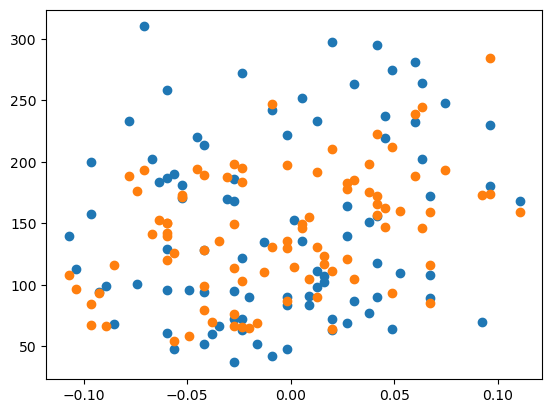

In [97]:
# (11) 정답 데이터와 예측한 데이터 시각화하기
# - x축에는 X 데이터의 첫 번째 컬럼을, y축에는 정답인 target 데이터를 넣어서 모델이 예측한 데이터를 시각화해주세요
## 예제 참고함
plt.scatter(X_test[:, 0], y_test)
plt.scatter(X_test[:, 0], prediction)
plt.show()